In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pr = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
pr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
pr.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pr.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
for r in pr.columns:
    print(f"Unique values of {r}'s are: {pr[r].nunique()}")
    print(f"{pr[r].unique()}\n")

Unique values of customerID's are: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique values of gender's are: 2
['Female' 'Male']

Unique values of SeniorCitizen's are: 2
[0 1]

Unique values of Partner's are: 2
['Yes' 'No']

Unique values of Dependents's are: 2
['No' 'Yes']

Unique values of tenure's are: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values of PhoneService's are: 2
['No' 'Yes']

Unique values of MultipleLines's are: 3
['No phone service' 'No' 'Yes']

Unique values of InternetService's are: 3
['DSL' 'Fiber optic' 'No']

Unique values of OnlineSecurity's are: 3
['No' 'Yes' 'No internet service']

Unique values of OnlineBackup's are: 3
['Yes' 'No' 'No internet service']

Unique values of DeviceProtection's are: 3
['No' 'Yes' 'No internet s

In [8]:
pr.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
pr.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

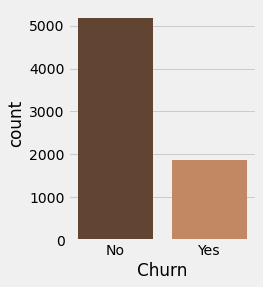

In [10]:
# frequency distribution for churn
plt.style.use("fivethirtyeight")
plt.figure(figsize=(3,4))
de = sns.countplot(x=pr['Churn'], palette = "copper", linewidth = 1)
plt.show()

In [11]:
#data cleaning
pr = pr.dropna()

tenure v/s Churn

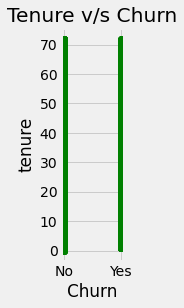

In [12]:
plt.figure(figsize=(1,4))
plt.scatter(pr['Churn'],pr['tenure'], color = 'green')
plt.title("Tenure v/s Churn")
plt.ylabel("tenure")
plt.xlabel("Churn")
plt.show()

In [13]:
X = pr.iloc[:,5:6]
y = pr.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# random_state=1000)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [16]:
ls_model = LogisticRegression()

In [17]:
ls_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = ls_model.predict(X_test)
y_pred

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
ls_model_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
ls_model_accuracy


73.1

In [20]:
y_pred_train = ls_model.predict(X_train)
y_pred_test = ls_model.predict(X_test)
accuracy_score(y_train, y_pred_train)

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7337593184238551

In [21]:
accuracy_score(y_test, y_pred_test)

0.7310149041873669

In [22]:
y_pred_prob = ls_model.predict_proba(X_test)
y_pred_prob[:5]

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[1.00000000e+00, 8.51392363e-25],
       [1.00000000e+00, 1.63729825e-28],
       [1.00000000e+00, 4.42722612e-21],
       [1.00000000e+00, 3.29033899e-25],
       [1.00000000e+00, 5.95693366e-17]])

In [23]:
f1_score(y_test, y_pred, average = None)

array([0.84460845, 0.        ])

In [24]:
con_ma = confusion_matrix(y_test, y_pred)
con_ma

array([[1030,    0],
       [ 379,    0]], dtype=int64)

In [25]:
print(con_ma)

[[1030    0]
 [ 379    0]]


C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Precision:  0.7310149041873669
Recall:  1.0


Text(0, 0.5, 'Precision')

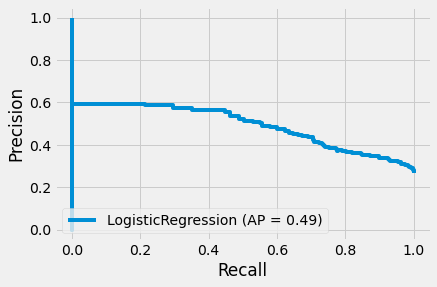

In [26]:
precision = precision_score(y_test, ls_model.predict(X_test), pos_label = 'No')
print('Precision: ', precision)

recall = recall_score(y_test, ls_model.predict(X_test), pos_label = 'No')
print('Recall: ', recall)

graph = plot_precision_recall_curve(ls_model, X_test, y_test)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.73      1.00      0.84      1030
         Yes       0.00      0.00      0.00       379

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.53      0.73      0.62      1409



C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
y_test.values.reshape(-1,1)
y_test.shape

(1409,)

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
def roc_curve_auc_score(X_test, y_test, y_pred_prob):
    y_pred_prob = y_pred_prob[:,1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_prob, pos_label = 2)
    roc_auc = auc(fpr, tpr) #
    
    plt.title(f'Logistic Regression - ROC Curve')
    plt.plot(fpr, tpr, 'red', label = 'AUC = %0.3f' % roc_auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [30]:
ls_model1 = LogisticRegression(max_iter=1000)
ls_model1.fit(X_train, y_train)
y_pred_ls_model1 = ls_model.predict(X_test)
y_pred_ls_model1_prob = ls_model.predict_proba(X_test)

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


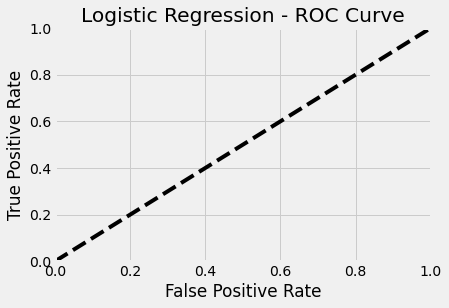

AUC Score (ROC): 0.7433678305197633



In [31]:
roc_curve_auc_score(X_test, y_test, y_pred_ls_model1_prob)

In [32]:
tpr,fpr, th = roc_curve(y_test, y_pred_prob[:,0], pos_label=2)
tpr[:5], fpr[:5], th[:5]

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


(array([0.        , 0.4158978 , 0.43364088, 0.43931867, 0.45209368]),
 array([nan, nan, nan, nan, nan]),
 array([2., 1., 1., 1., 1.]))

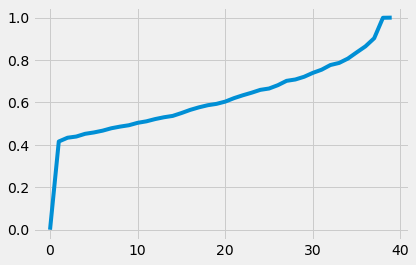

In [33]:
plt.plot(tpr)#, plt.plot(th, tpr)

In [34]:
#predict the probability of churn of each customer
pr['Probability_of_churn'] = ls_model.predict_proba(pr[X_test.columns])[:,1]

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
#create a datframe showcasing probability of churn of each customer
pr[['customerID', 'Probability_of_churn']]

,customerID,Probability_of_churn
0,7590-VHVEG,1.012843e-01
1,5575-GNVDE,2.670418e-15
2,3668-QPYBK,4.173645e-02
3,7795-CFOCW,7.670065e-20
4,9237-HQITU,4.173645e-02
...,...,...
7038,6840-RESVB,3.593108e-11
7039,2234-XADUH,5.454980e-31
7040,4801-JZAZL,8.375775e-06
7041,8361-LTMKD,6.463033e-03


In [36]:
parameter_grid_log_reg = {'max_iter': [7043], 'solver': ['liblinear'], 'class_weight': ['balanced']}

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid_S1 = {'penalty': ['l1', 'l2'], 'C':np.arange(.1,5,.1)}
ls_model_tuned = LogisticRegression(solver = 'saga', max_iter = 1000)
ls_model_tuned_p = GridSearchCV(ls_model_tuned, param_grid_S1, cv=5)
ls_model_tuned_p.fit(X_train, y_train)

y_pred_ls_model_tuned = ls_model_tuned_p.predict(X_test)
y_pred_ls_model_tuned_prob = ls_model_tuned_p.predict_proba(X_test)

print('Logistic Regressionm - Best Parameters: ', ls_model_tuned_p.best_params_)

Logistic Regressionm - Best Parameters:  {'C': 1.4000000000000001, 'penalty': 'l2'}


C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


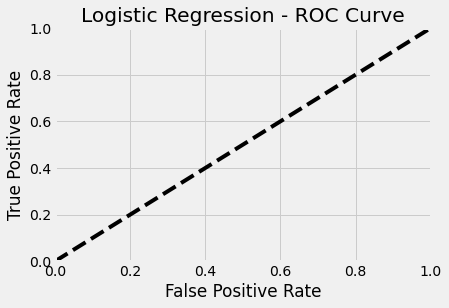

AUC Score (ROC): 0.7433678305197633



In [38]:
roc_curve_auc_score(X_test, y_test, y_pred_ls_model_tuned_prob)